In [2]:
from base_m_noise import *
import base_m_noise; importlib.reload(base_m_noise)

s_ = 12
params = {'xtick.labelsize': s_, 'ytick.labelsize': s_,
              'legend.fontsize': s_, 'axes.labelsize': s_,
              'axes.titlesize': s_,  'font.size': s_, 
              'legend.handlelength': 2}
sns.set_theme(style="white", rc=params)

The below figure shows time plots and the stationary probability density of the SDE: $\dot{x} = \omega x^n + \sqrt{2D}x^m\xi(t)$ where we assume $n = 0$. 
 
We in general distinguish 3 different cases depending on whether $n - 2m + 1$ is less than, great than or equal to 0.

10
10
10


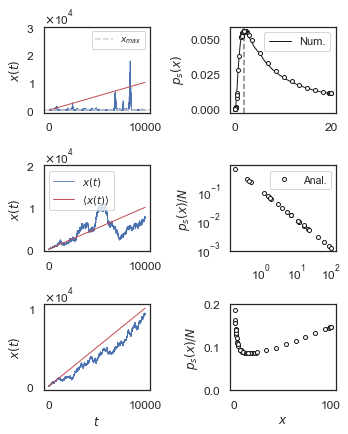

In [ ]:
f, ax = plt.subplots(3, 2, figsize=(5, 6.2))
sns.set_theme(style="white", rc=params)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

#########

T = 10000
om, D1, D2 = 1, 0.4, 0

tl_08, Xl_08 = SDE_ev(om, D1, D2, T, f_mon, g_mon, dt=0.001, m=0.8, xinit=1, osc=False, steps=100) # lam=0,
an_08 = [om*t for t in tl_08]

x_per_08, P_per_08 = stat_den_sde(1, 0.4, 0, 100000, f_, g_mon, 0.001, m=0.8, osc=False, lim=20)

xmax = (om/(2*D1))**(5/3) + 0.5

ax[0,0].plot(tl_08, Xl_08, 'b', linewidth=0.8) 
ax[0,0].plot(tl_08, an_08, 'r', linewidth=1) 
ax[0,0].set_yticks([0,10000,20000,30000])
ax[0,0].yaxis.set_major_formatter(formatter) 
ax[0,0].set_ylabel(r"$x(t)$")
ax[0,0].axhline(xmax, color = 'lightgrey', linestyle = '--', label=r'$x_{max}$')
ax[0,0].legend(fontsize=9)

df=pd.read_csv("/linear_Dm0p4_n0_m0p8.txt", sep="\t", header=None)
df.columns=['x', 'p']

ax[0,1].axvline(xmax, color = 'grey', linestyle = '--')

ax[0,1].plot(x_per_08, P_per_08, '-', color='k', linewidth=1, label=r'Num.')
P = np.array(df['p'][1::4])*(np.max(P_per_08)/np.max(df['p'][1::4]))
ax[0,1].plot(df['x'][1::4], P, 'o', color='w', markersize=4, mec = 'k') 
ax[0,1].set_ylabel(r"$p_{s}(x)$")
ax[0,1].legend(fontsize=11)

f.tight_layout()

#########

tl_05, Xl_05 = SDE_ev(om, D1, D2, T, f_, g_mon, m=0.5, dt=0.001, xinit=1, osc=False, steps=100) # lam=0, 
an_05 = [om*t for t in tl_05]

ax[1,0].plot(tl_05, Xl_05, 'b', linewidth=0.8, label=r'$x(t)$')
ax[1,0].plot(tl_05, an_05, 'r', linewidth=1, label=r'$\langle x(t) \rangle$')
ax[1,0].set_ylabel(r'$x(t)$')
ax[1,0].yaxis.set_major_formatter(formatter) 
ax[1,0].set_yticks([0,10000,20000])
ax[1,0].legend(fontsize=10.4)

df=pd.read_csv("/linear_Dm5_n0_m0p5.txt", sep="\t", header=None)
df.columns=['x', 'p']; space=10
P = np.array(df['p'][1::space])

ax[1,1].loglog(df['x'][1::space], P, 'o', color='w', markersize=4, mec = 'k', label=r'Anal.')
ax[1,1].set_ylabel(r"$p_{s}(x)/N$")
ax[1,1].legend(fontsize=10.4)

T = 10000
om, D1, D2 = 1, 1, 0

tl_035, Xl_035 = SDE_ev(om, D1, D2, T, f_, g_mon, dt=0.001, xinit=1, m=0.35, osc=False, steps=100) # lam=0,
an_035 = [om*t for t in tl_035]

ax[2,0].plot(tl_035, Xl_035, 'b', linewidth=0.7, label=r'$x(t)$')
ax[2,0].plot(tl_035, an_035, 'r', linewidth=1, label=r'$\langle x(t) \rangle$')
ax[2,0].set_xlabel(r'$t$')
ax[2,0].set_ylabel(r'$x(t)$')
ax[2,0].set_yticks([0,10000])
ax[2,0].yaxis.set_major_formatter(formatter) 

df=pd.read_csv("/linear_Dm5_n0_m0p3.txt", sep="\t", header=None)
df.columns=['x', 'p']

ax[2,1].plot(df['x'][1::5], df['p'][1::5], 'wo', markersize=4, mec = 'k', label='Anal.')
ax[2,1].set_ylim([0,0.2])
ax[2,1].set_xlabel(r"$x$")
ax[2,1].set_ylabel(r"$p_{s}(x)/N$")

#########

f.tight_layout()

#f.savefig('/mon_tplot_prob_all.png', bbox_inches='tight', format='png', dpi=150)